In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [102]:
#Load the dataset
bankdf = pd.read_csv('bank-full.csv', delimiter=';')
bankdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [103]:
print(bankdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


## **Exploratory Data Analysis**

In [104]:
#Summary of the dataset
print(bankdf.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [105]:
#dropping the outlier in previous
bankdf['previous'] = bankdf['previous'].replace(275, bankdf['previous'].mean())

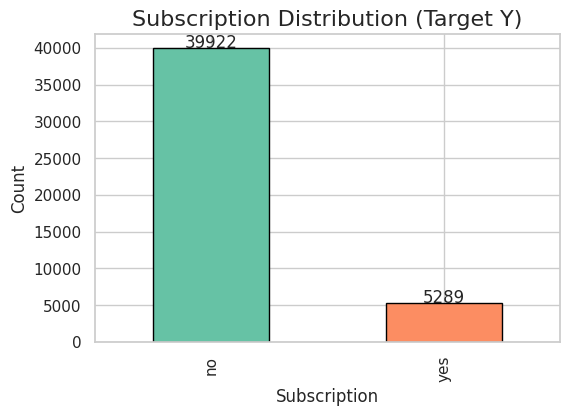

In [106]:
plt.figure(figsize=(6,4))

bankdf['y'].value_counts().plot(kind='bar', color=['#66c2a5', '#fc8d62'], edgecolor='black')
plt.title('Subscription Distribution (Target Y)', fontsize=16)
plt.xlabel('Subscription', fontsize=12)
plt.ylabel('Count', fontsize=12)

for index, value in enumerate(bankdf['y'].value_counts()):
    plt.text(index, value + 100, str(value), ha='center', fontsize=12)
plt.show()

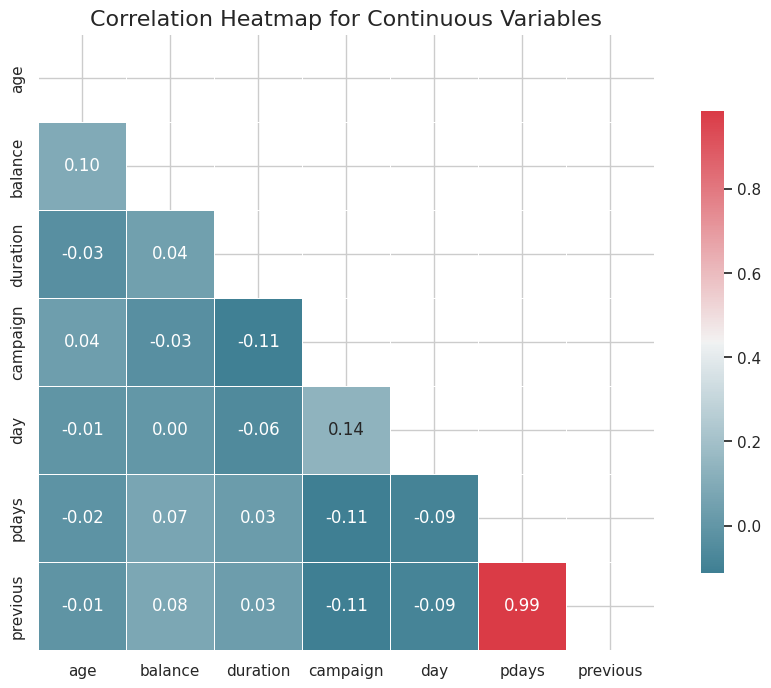

In [107]:
plt.figure(figsize=(12,8))

continuous_columns = ['age', 'balance', 'duration', 'campaign','day', 'pdays', 'previous']
corr_continuous = bankdf[continuous_columns].corr(method='spearman')

#cmap for highlighting positive and negative correlations
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.set(style="whitegrid")
mask = np.triu(np.ones_like(corr_continuous, dtype=bool))

#Plot the heatmap for continuous variables
sns.heatmap(corr_continuous, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5,mask=mask, cbar_kws={"shrink": 0.75}, square=True)

plt.title("Correlation Heatmap for Continuous Variables", size=16)
plt.show()

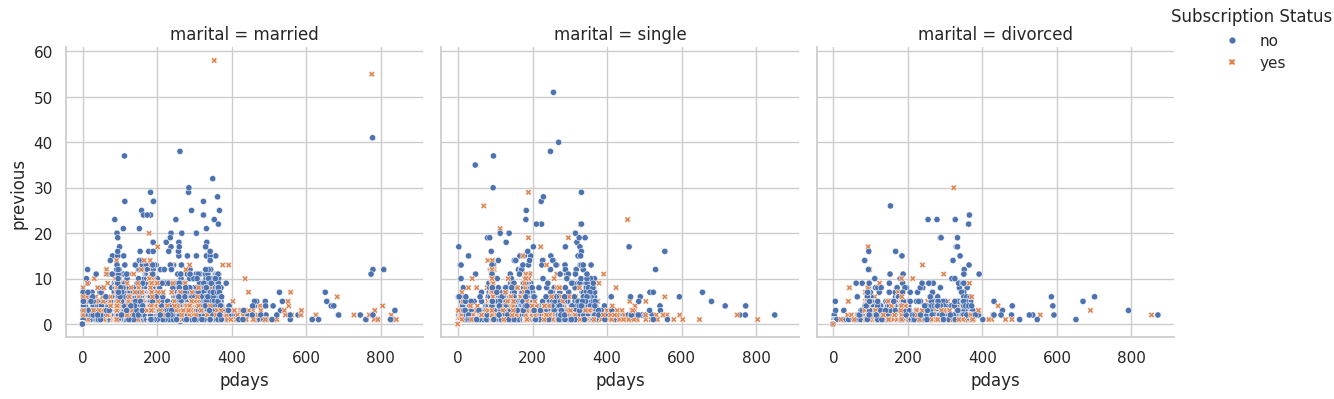

In [108]:
sns.set(style="whitegrid")

relplot = sns.relplot(
    data=bankdf,
    x="pdays", y="previous", col="marital",
    hue="y", style="y",
    s = 20,
    height=4,
    aspect=1
)

relplot._legend.set_bbox_to_anchor((1.05, 0.9))
relplot._legend.set_title('Subscription Status')

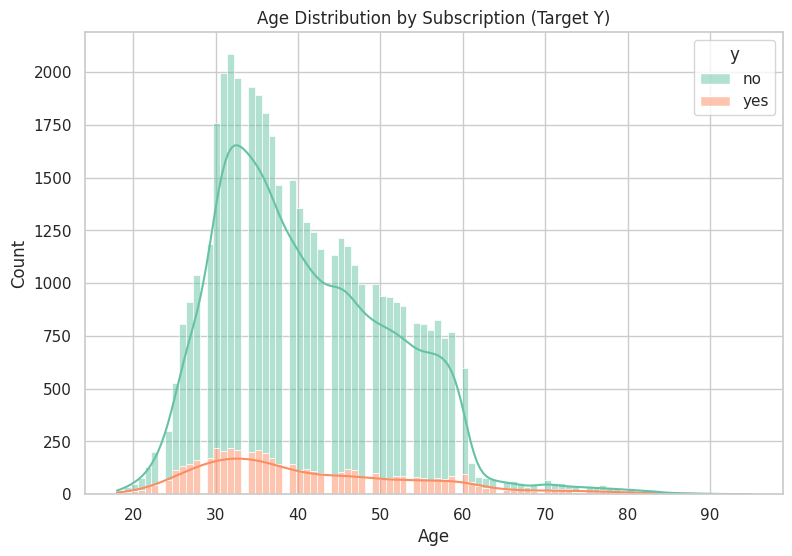

In [109]:

#looking at the age distribution
plt.figure(figsize=(9, 6))
sns.histplot(data=bankdf, x='age', hue='y', kde=True, multiple='stack', palette='Set2')
plt.title('Age Distribution by Subscription (Target Y)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

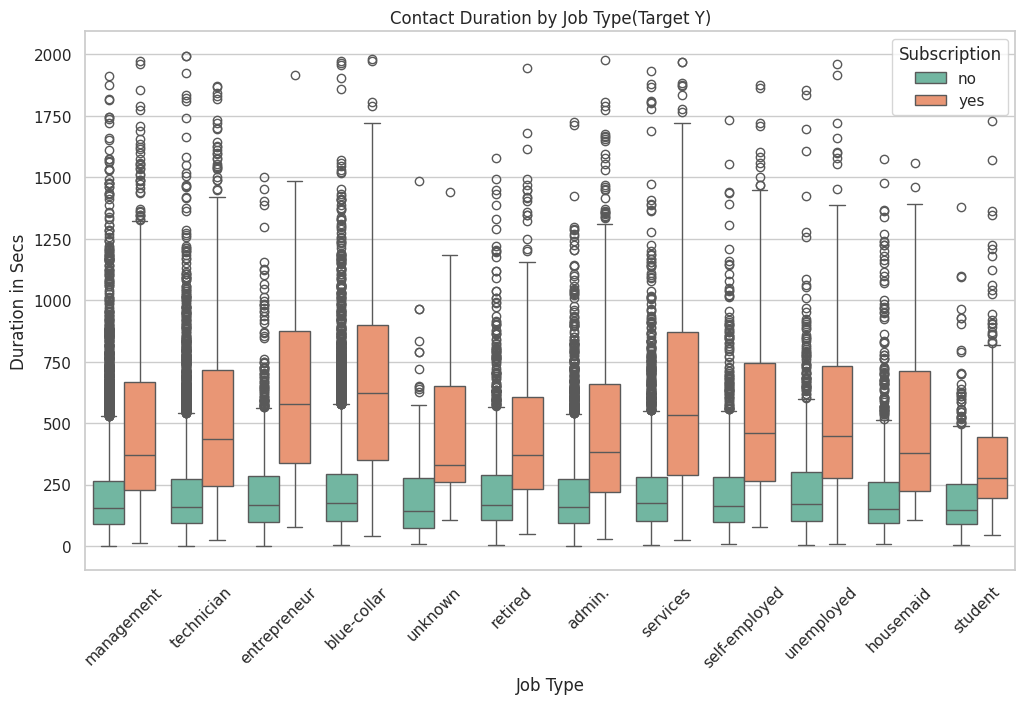

In [110]:
plt.figure(figsize=(12, 7))

#restricting the boxplot to only show data for clients with contact duration ≤ 2000 secs

bankdf_filtered = bankdf[bankdf['duration'] <= 2000]
sns.set(style="whitegrid")
sns.boxplot(x='job', y='duration', hue='y', data=bankdf_filtered, palette='Set2')
plt.xticks(rotation=45)
plt.title('Contact Duration by Job Type(Target Y)')
plt.xlabel('Job Type')
plt.ylabel('Duration in Secs')
plt.legend(title='Subscription')
plt.show()




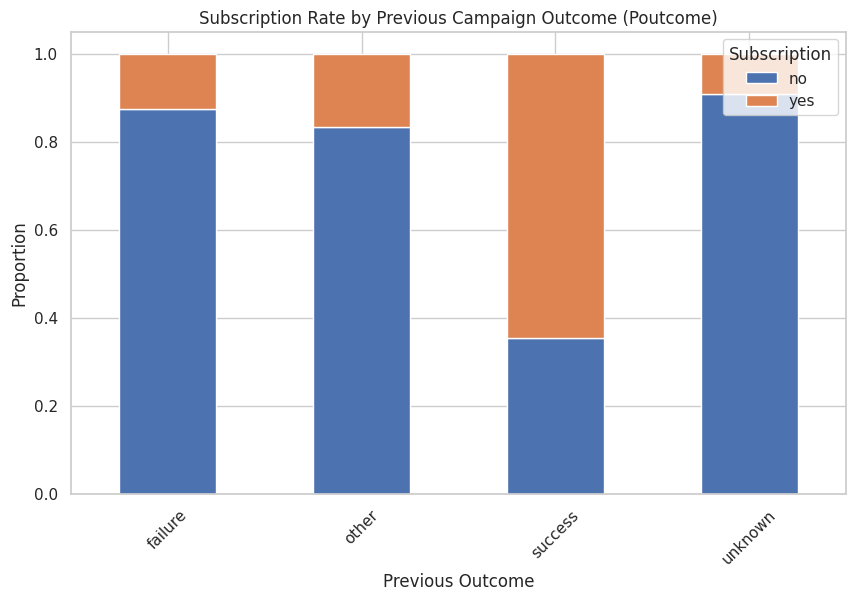

In [111]:
#computing proportions
crosstab = pd.crosstab(bankdf['poutcome'], bankdf['y'], normalize='index')

#stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Subscription Rate by Previous Campaign Outcome (Poutcome)')
plt.xlabel('Previous Outcome')
plt.ylabel('Proportion')
plt.legend(title='Subscription', loc='upper right')

plt.xticks(rotation=45)
plt.show()


<Figure size 1000x1000 with 0 Axes>

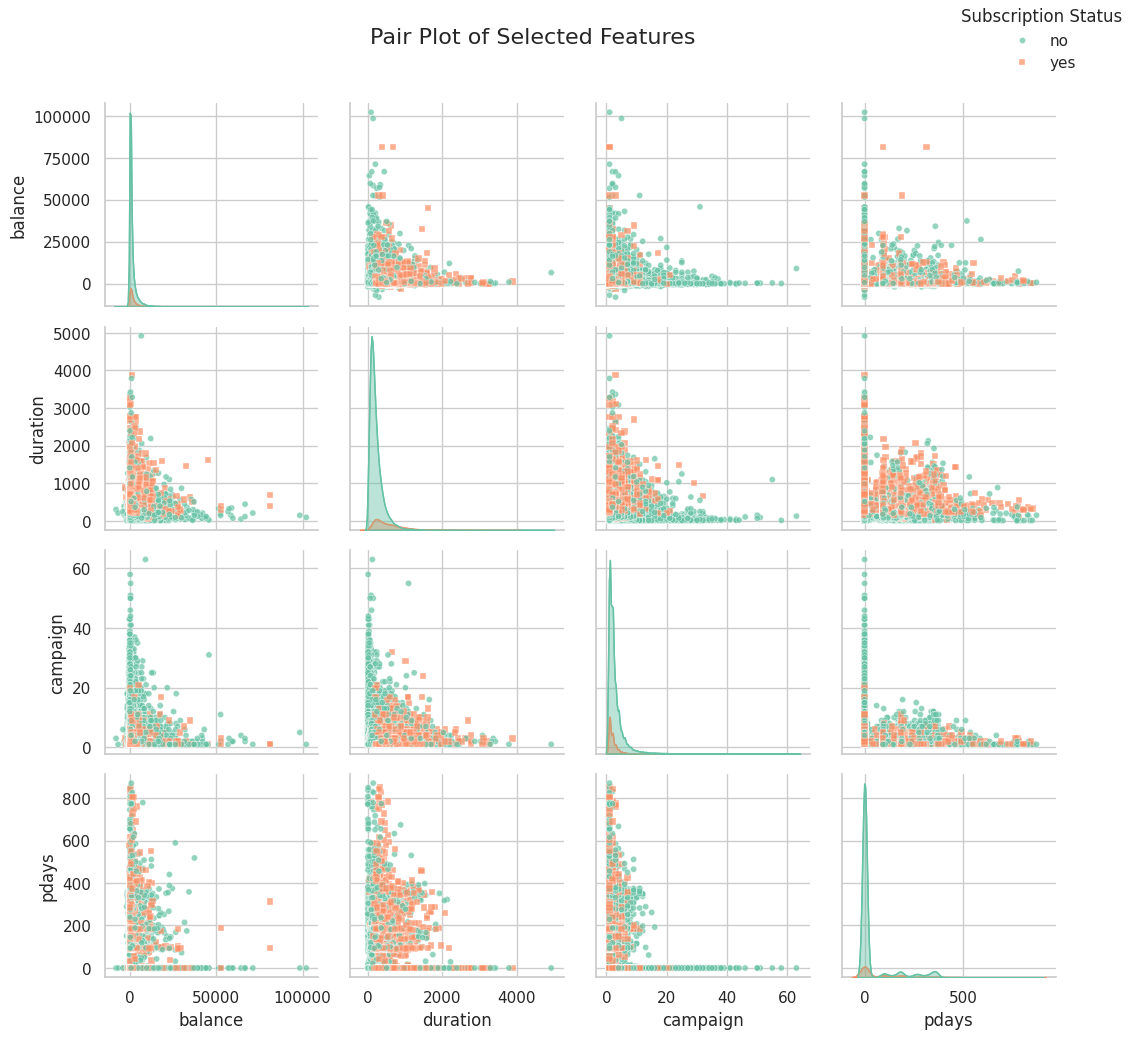

In [112]:

columns_to_plot = [ 'balance', 'duration', 'campaign', 'pdays']


plt.figure(figsize=(10, 10))
pairplot = sns.pairplot(bankdf[columns_to_plot + ['y']],
                        hue='y',
                        palette='Set2',
                        markers=["o", "s"],  #different markers for categories
                        plot_kws={'alpha': 0.7, 's': 20})  #Adjust transparency and marker size

#Use KDE plots on the diagonal
pairplot.map_diag(sns.kdeplot, shade=True)

pairplot._legend.set_bbox_to_anchor((1.05, 1))
pairplot._legend.set_title('Subscription Status')

plt.suptitle("Pair Plot of Selected Features", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


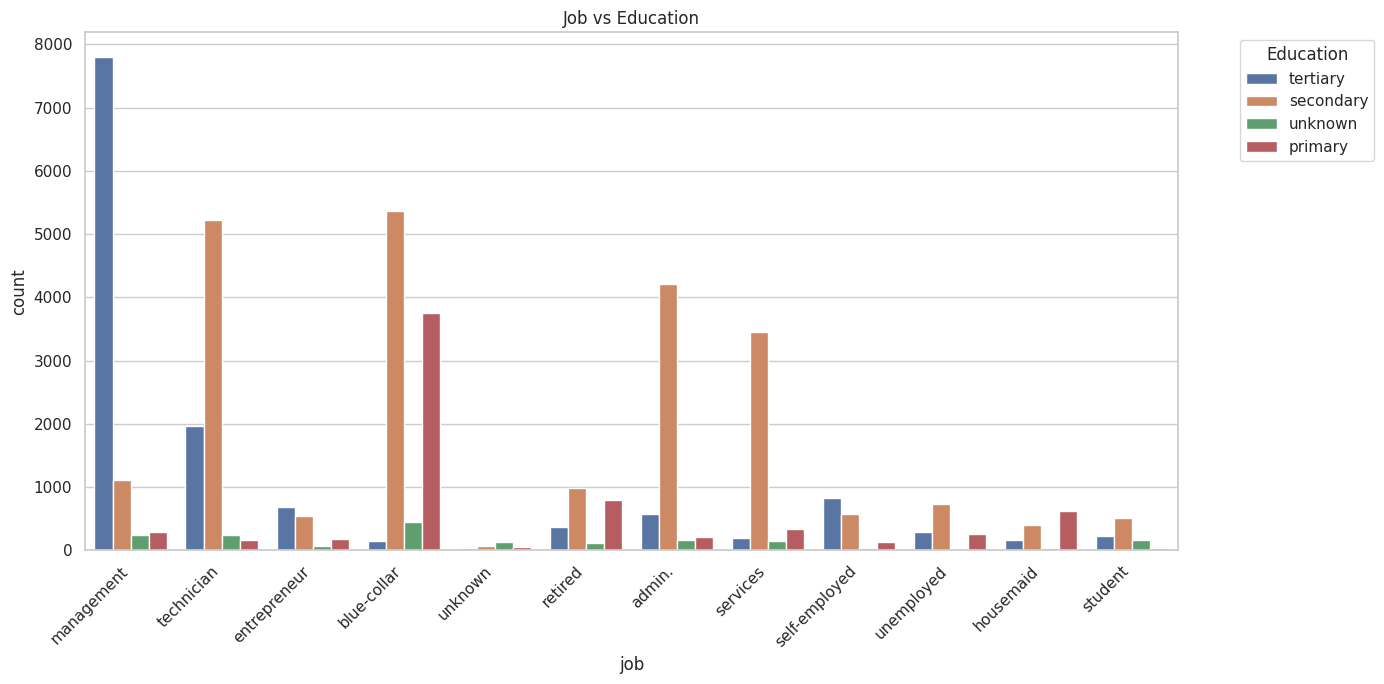

In [113]:
#plot dipicting people's job and their respective level of education

plt.figure(figsize=(14, 7))
sns.countplot(x='job', hue='education', data=bankdf)
plt.title("Job vs Education")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **Feature Engineering**

#### New Features added:
###### 1. age_group
###### 2. previous_outcome
###### 3. log_duration

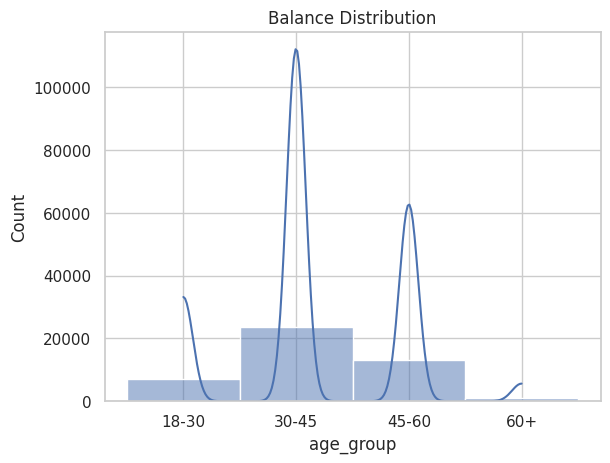

In [114]:
#new feature age groups
bankdf['age_group'] = pd.cut(bankdf['age'], bins=[18, 30, 45, 60, 100], labels=['18-30', '30-45', '45-60', '60+'])

sns.set(style="whitegrid")
sns.histplot(bankdf['age_group'], kde=True)
plt.title("Balance Distribution")
plt.show()

In [115]:
#Previous Outcome Feature
bankdf['previous_outcome'] = bankdf['poutcome'].apply(lambda x: 1 if x == 'success' else 0)

In [116]:
#standardise the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bankdf[['balance', 'duration', 'campaign']] = scaler.fit_transform(bankdf[['balance', 'duration', 'campaign']])

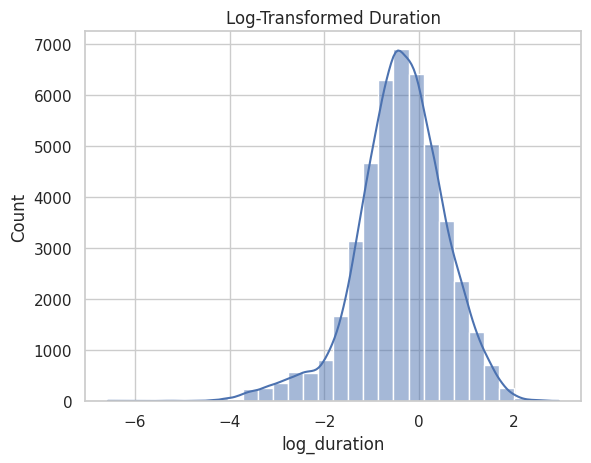

In [117]:
# Apply log transformation to reduce skewness
bankdf['log_duration'] = np.log1p(bankdf['duration'])

# Checking the distribution of the transformed variable
sns.histplot(bankdf['log_duration'], bins=30, kde=True)
plt.title('Log-Transformed Duration')
plt.show()


In [118]:
bank_df = bankdf

## Naives Bayes Model

In [119]:
# Model 0
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, matthews_corrcoef
import numpy as np
import pandas as pd

bankdf_encoded = pd.get_dummies(bankdf,
                                columns=['job', 'marital', 'education', 'age_group', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'],
                                drop_first=True)

# Convert the target variable to binary (yes/no to 1/0)
bankdf_encoded['y'] = bankdf_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Initialize KFold cross-validation (5 splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold_mccs = []  # To store MCC values for each fold
fold_class_reports = []  # To store classification reports for each fold

for train_index, test_index in kf.split(bankdf_encoded):
    # Split the data into training and testing for the current fold
    bankdf_train = bankdf_encoded.iloc[train_index]
    bankdf_test = bankdf_encoded.iloc[test_index]

    # Oversampling on the training set using SMOTE
    X = bankdf_train.drop('y', axis=1)
    y = bankdf_train['y']

    imputer = SimpleImputer(strategy='mean')  # Impute missing values if any
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Apply SMOTE for oversampling
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

    # Combine resampled features and target variable
    bankdf_balanced_train = pd.DataFrame(X_resampled, columns=X.columns)
    bankdf_balanced_train['y'] = y_resampled

    # Naive Bayes doesn't require scaling
    X_train_fold = bankdf_balanced_train.drop('y', axis=1)

    # Impute missing values in the test set
    X_test_fold = bankdf_test.drop('y', axis=1)
    X_test_fold_imputed = pd.DataFrame(imputer.transform(X_test_fold), columns=X.columns)

    y_train_fold = bankdf_balanced_train['y']
    y_test_fold = bankdf_test['y']

    # Define the Naive Bayes model
    model = GaussianNB()

    # Train the model on the oversampled training set
    model.fit(X_train_fold, y_train_fold)

    # Predict on the imputed test fold
    y_pred_fold = model.predict(X_test_fold_imputed)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y_test_fold, y_pred_fold)
    print(f"Confusion Matrix for Fold: \n{cm}")

    # Classification Report as a dictionary
    class_report = classification_report(y_test_fold, y_pred_fold, output_dict=True)
    fold_class_reports.append(class_report)  # Store each fold's report
    print(f"Classification Report for Fold: \n{classification_report(y_test_fold, y_pred_fold)}")

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test_fold, y_pred_fold)
    fold_mccs.append(mcc)  # Add MCC for the current fold
    print(f"MCC for Fold: {mcc}")

    print(f"Fold Accuracy: {fold_accuracy}\n")

# The average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy over 5 folds: {average_accuracy}")

# The average MCC across all folds
average_mcc = np.mean(fold_mccs)
print(f"Average MCC over 5 folds: {average_mcc}")

# Average Classification Report over 5 folds
avg_class_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in fold_class_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in fold_class_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in fold_class_reports])
}

print("\nAverage Classification Report over 5 folds:")
print(f"Precision: {avg_class_report['precision']}")
print(f"Recall: {avg_class_report['recall']}")
print(f"F1-Score: {avg_class_report['f1-score']}")

Confusion Matrix for Fold: 
[[7195  757]
 [ 500  591]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7952
           1       0.44      0.54      0.48      1091

    accuracy                           0.86      9043
   macro avg       0.69      0.72      0.70      9043
weighted avg       0.88      0.86      0.87      9043

MCC for Fold: 0.4083487302641142
Fold Accuracy: 0.8609974565962623

Confusion Matrix for Fold: 
[[7278  754]
 [ 474  536]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      8032
           1       0.42      0.53      0.47      1010

    accuracy                           0.86      9042
   macro avg       0.68      0.72      0.69      9042
weighted avg       0.88      0.86      0.87      9042

MCC for Fold: 0.39343400129307754
Fold Accuracy: 0.8641893386418934

Confusion Matrix for Fold: 
[[717

In [120]:
#Exploring the parameter grid for var_smoothing and using GridSearchCV to find the best parameters for the Naive Bayes model.

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, matthews_corrcoef
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Assuming bankdf is your dataframe
bankdf_encoded = pd.get_dummies(bankdf,
                                columns=['job', 'marital','education', 'age_group', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'],
                                drop_first=True)

# Convert the target variable to binary (yes/no to 1/0)
bankdf_encoded['y'] = bankdf_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Define the parameter grid for var_smoothing
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Adjust range as needed
}

# Initialize KFold cross-validation (5 splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold_mccs = []  # To store MCC values for each fold
fold_class_reports = []  # To store classification reports for each fold

for train_index, test_index in kf.split(bankdf_encoded):
    # Split the data into training and testing for the current fold
    bankdf_train = bankdf_encoded.iloc[train_index]
    bankdf_test = bankdf_encoded.iloc[test_index]

    # Oversampling on the training set using SMOTE
    X = bankdf_train.drop('y', axis=1)
    y = bankdf_train['y']

    imputer = SimpleImputer(strategy='mean')  # Impute missing values if any
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Apply SMOTE for oversampling
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

    # Combine resampled features and target variable
    bankdf_balanced_train = pd.DataFrame(X_resampled, columns=X.columns)
    bankdf_balanced_train['y'] = y_resampled

    # Naive Bayes doesn't require scaling
    X_train_fold = bankdf_balanced_train.drop('y', axis=1)

    # Impute missing values in the test set
    X_test_fold = bankdf_test.drop('y', axis=1)
    X_test_fold_imputed = pd.DataFrame(imputer.transform(X_test_fold), columns=X.columns)

    y_train_fold = bankdf_balanced_train['y']
    y_test_fold = bankdf_test['y']

    # Define the Naive Bayes model
    model = GaussianNB()

    # GridSearchCV for var_smoothing
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

    # Train the model using GridSearchCV on the oversampled training set
    grid_search.fit(X_train_fold, y_train_fold)

    # Best model from grid search
    best_model = grid_search.best_estimator_
    print(f"Best var_smoothing: {best_model.get_params()['var_smoothing']}")

    # Predict on the imputed test fold
    y_pred_fold = best_model.predict(X_test_fold_imputed)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y_test_fold, y_pred_fold)
    print(f"Confusion Matrix for Fold: \n{cm}")

    # Classification Report
    class_report = classification_report(y_test_fold, y_pred_fold, output_dict=True)
    fold_class_reports.append(class_report)
    print(f"Classification Report for Fold: \n{classification_report(y_test_fold, y_pred_fold)}")

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test_fold, y_pred_fold)
    fold_mccs.append(mcc)  # Add MCC for the current fold
    print(f"MCC for Fold: {mcc}")

    print(f"Fold Accuracy: {fold_accuracy}\n")

# The average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy over 5 folds: {average_accuracy}")

# The average MCC across all folds
average_mcc = np.mean(fold_mccs)
print(f"Average MCC over 5 folds: {average_mcc}")


# Compute average classification report over 5 folds
# Initialize a dictionary to hold average precision, recall, and f1-score for macro avg
avg_class_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in fold_class_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in fold_class_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in fold_class_reports])
}

# Print average classification report
print("\nAverage Classification Report over 5 folds:")
print(f"Precision: {avg_class_report['precision']}")
print(f"Recall: {avg_class_report['recall']}")
print(f"F1-Score: {avg_class_report['f1-score']}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best var_smoothing: 5.3366992312063123e-05
Confusion Matrix for Fold: 
[[6172 1780]
 [ 226  865]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      7952
           1       0.33      0.79      0.46      1091

    accuracy                           0.78      9043
   macro avg       0.65      0.78      0.66      9043
weighted avg       0.89      0.78      0.81      9043

MCC for Fold: 0.40741181955326927
Fold Accuracy: 0.7781709609642817

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best var_smoothing: 4.328761281083062e-05
Confusion Matrix for Fold: 
[[6350 1682]
 [ 213  797]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      8032
           1       0.32      0.79      0.46      1010

    accuracy                           0.79      9042

In [121]:
#Bernoulli Naive Bayes

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB  # Changed from GaussianNB to BernoulliNB
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, matthews_corrcoef
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Assuming bankdf is your dataframe
bankdf_encoded = pd.get_dummies(bankdf,
                                columns=['job', 'marital','education', 'age_group', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'],
                                drop_first=True)

# Convert the target variable to binary (yes/no to 1/0)
bankdf_encoded['y'] = bankdf_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Define the parameter grid for alpha (smoothing parameter)
param_grid = {
    'alpha': np.logspace(-10, 1, num=100)  # Adjust alpha range for better tuning
}

# Initialize KFold cross-validation (5 splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold_mccs = []  # To store MCC values for each fold
fold_class_reports = []  # To store classification reports for each fold

for train_index, test_index in kf.split(bankdf_encoded):
    # Split the data into training and testing for the current fold
    bankdf_train = bankdf_encoded.iloc[train_index]
    bankdf_test = bankdf_encoded.iloc[test_index]

    # Oversampling on the training set using SMOTE
    X = bankdf_train.drop('y', axis=1)
    y = bankdf_train['y']

    imputer = SimpleImputer(strategy='mean')  # Impute missing values if any
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Apply SMOTE for oversampling
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

    # Combine resampled features and target variable
    bankdf_balanced_train = pd.DataFrame(X_resampled, columns=X.columns)
    bankdf_balanced_train['y'] = y_resampled

    # Apply a threshold to convert features to binary values for BernoulliNB
    X_train_fold = (bankdf_balanced_train.drop('y', axis=1) > 0).astype(int)  # Convert to binary

    # Impute missing values in the test set and convert to binary
    X_test_fold = bankdf_test.drop('y', axis=1)
    X_test_fold_imputed = pd.DataFrame(imputer.transform(X_test_fold), columns=X.columns)
    X_test_fold_imputed = (X_test_fold_imputed > 0).astype(int)  # Convert to binary

    y_train_fold = bankdf_balanced_train['y']
    y_test_fold = bankdf_test['y']

    # Define the Bernoulli Naive Bayes model
    model = BernoulliNB()

    # GridSearchCV for alpha
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

    # Train the model using GridSearchCV on the oversampled training set
    grid_search.fit(X_train_fold, y_train_fold)

    # Best model from grid search
    best_model = grid_search.best_estimator_
    print(f"Best alpha: {best_model.get_params()['alpha']}")

    # Predict on the imputed test fold
    y_pred_fold = best_model.predict(X_test_fold_imputed)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y_test_fold, y_pred_fold)
    print(f"Confusion Matrix for Fold: \n{cm}")

    # Classification Report
    class_report = classification_report(y_test_fold, y_pred_fold, output_dict=True)
    fold_class_reports.append(class_report)
    print(f"Classification Report for Fold: \n{classification_report(y_test_fold, y_pred_fold)}")

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test_fold, y_pred_fold)
    fold_mccs.append(mcc)  # Add MCC for the current fold
    print(f"MCC for Fold: {mcc}")

    print(f"Fold Accuracy: {fold_accuracy}\n")

# The average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy over 5 folds: {average_accuracy}")

# The average MCC across all folds
average_mcc = np.mean(fold_mccs)
print(f"Average MCC over 5 folds: {average_mcc}")

# Compute average classification report over 5 folds
# Initialize a dictionary to hold average precision, recall, and f1-score for macro avg
avg_class_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in fold_class_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in fold_class_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in fold_class_reports])
}

# Print average classification report
print("\nAverage Classification Report over 5 folds:")
print(f"Precision: {avg_class_report['precision']}")
print(f"Recall: {avg_class_report['recall']}")
print(f"F1-Score: {avg_class_report['f1-score']}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best alpha: 10.0
Confusion Matrix for Fold: 
[[6607 1345]
 [ 418  673]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      7952
           1       0.33      0.62      0.43      1091

    accuracy                           0.81      9043
   macro avg       0.64      0.72      0.66      9043
weighted avg       0.87      0.81      0.83      9043

MCC for Fold: 0.3502503439241098
Fold Accuracy: 0.8050425743669136

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best alpha: 10.0
Confusion Matrix for Fold: 
[[6698 1334]
 [ 371  639]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      8032
           1       0.32      0.63      0.43      1010

    accuracy                           0.81      9042
   macro avg       0.64      0.73      0.66      90

In [122]:
#Feature Selection - Top 10
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, matthews_corrcoef
import numpy as np

# Initialize KFold cross-validation (5 splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold_mccs = []  # To store MCC values for each fold

# Placeholder for storing feature importance across folds
feature_importances = pd.DataFrame()

for train_index, test_index in kf.split(bankdf_encoded):
    # Split the data into training and testing for the current fold
    bankdf_train = bankdf_encoded.iloc[train_index]
    bankdf_test = bankdf_encoded.iloc[test_index]

    # Oversampling on the training set using SMOTE
    X = bankdf_train.drop('y', axis=1)
    y = bankdf_train['y']

    imputer = SimpleImputer(strategy='mean')  # Impute missing values if any
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Apply feature selection (SelectKBest in this case)
    selector = SelectKBest(f_classif, k=10)  # Select top 10 features (adjust as needed)
    X_selected = selector.fit_transform(X_imputed, y)
    selected_columns = X_imputed.columns[selector.get_support()]  # Get selected columns

    # Apply SMOTE for oversampling
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_selected, y)

    # Combine resampled features and target variable
    bankdf_balanced_train = pd.DataFrame(X_resampled, columns=selected_columns)
    bankdf_balanced_train['y'] = y_resampled

    # Naive Bayes doesn't require scaling
    X_train_fold = bankdf_balanced_train.drop('y', axis=1)

    # Impute missing values in the test set using the training set imputer
    X_test_fold = bankdf_test.drop('y', axis=1)
    X_test_fold_imputed = pd.DataFrame(imputer.transform(X_test_fold), columns=X.columns)

    # Apply feature selection transformation to the test set to match the training set
    X_test_fold_selected = X_test_fold_imputed[selected_columns]  # Select the same features as in the training set

    y_train_fold = bankdf_balanced_train['y']
    y_test_fold = bankdf_test['y']

    # Define the Naive Bayes model
    model = GaussianNB()

    # Train the model on the oversampled training set
    model.fit(X_train_fold, y_train_fold)

    # Predict on the imputed test fold
    y_pred_fold = model.predict(X_test_fold_selected)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y_test_fold, y_pred_fold)
    print(f"Confusion Matrix for Fold: \n{cm}")

    # Classification Report
    class_report = classification_report(y_test_fold, y_pred_fold)
    print(f"Classification Report for Fold: \n{class_report}")

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test_fold, y_pred_fold)
    fold_mccs.append(mcc)  # Add MCC for the current fold
    print(f"MCC for Fold: {mcc}")

    print(f"Fold Accuracy: {fold_accuracy}\n")

    # Collect feature importances: Naive Bayes coefficients for feature importance
    # Here, we use the absolute values of the model coefficients to determine importance
    feature_importance = pd.DataFrame({
        'Feature': selected_columns,
        'Importance': np.abs(model.theta_[1] - model.theta_[0])  # Difference between class distributions
    })

    # Append feature importance for each fold
    feature_importances = pd.concat([feature_importances, feature_importance], axis=0)

# The average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy over 5 folds: {average_accuracy}")

# The average MCC across all folds
average_mcc = np.mean(fold_mccs)
print(f"Average MCC over 5 folds: {average_mcc}")

# Average Classification Report over 5 folds
avg_class_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in fold_class_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in fold_class_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in fold_class_reports])
}

print("\nAverage Classification Report over 5 folds:")
print(f"Precision: {avg_class_report['precision']}")
print(f"Recall: {avg_class_report['recall']}")
print(f"F1-Score: {avg_class_report['f1-score']}")

# Average feature importance across all folds
# Group by feature and average the importance scores
feature_importances_avg = feature_importances.groupby('Feature').mean().reset_index()

# Sort the feature importances in descending order of importance
feature_importances_avg_sorted = feature_importances_avg.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\nAverage Feature Importance over 5 folds (Sorted):")
print(feature_importances_avg_sorted)

Confusion Matrix for Fold: 
[[7493  459]
 [ 572  519]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7952
           1       0.53      0.48      0.50      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.71      0.72      9043
weighted avg       0.88      0.89      0.88      9043

MCC for Fold: 0.4383730340232217
Fold Accuracy: 0.885989162888422

Confusion Matrix for Fold: 
[[7570  462]
 [ 544  466]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8032
           1       0.50      0.46      0.48      1010

    accuracy                           0.89      9042
   macro avg       0.72      0.70      0.71      9042
weighted avg       0.88      0.89      0.89      9042

MCC for Fold: 0.4191973946330255
Fold Accuracy: 0.8887414288874143

Confusion Matrix for Fold: 
[[7510 

In [123]:
#Feature Selection - Top 6
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, matthews_corrcoef
import numpy as np

# Initialize KFold cross-validation (5 splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold_mccs = []  # To store MCC values for each fold

# Placeholder for storing feature importance across folds
feature_importances = pd.DataFrame()

for train_index, test_index in kf.split(bankdf_encoded):
    # Split the data into training and testing for the current fold
    bankdf_train = bankdf_encoded.iloc[train_index]
    bankdf_test = bankdf_encoded.iloc[test_index]

    # Oversampling on the training set using SMOTE
    X = bankdf_train.drop('y', axis=1)
    y = bankdf_train['y']

    imputer = SimpleImputer(strategy='mean')  # Impute missing values if any
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Apply feature selection (SelectKBest in this case)
    selector = SelectKBest(f_classif, k=6)  # Select top 6 features (adjust as needed)
    X_selected = selector.fit_transform(X_imputed, y)
    selected_columns = X_imputed.columns[selector.get_support()]  # Get selected columns

    # Apply SMOTE for oversampling
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_selected, y)

    # Combine resampled features and target variable
    bankdf_balanced_train = pd.DataFrame(X_resampled, columns=selected_columns)
    bankdf_balanced_train['y'] = y_resampled

    # Naive Bayes doesn't require scaling
    X_train_fold = bankdf_balanced_train.drop('y', axis=1)

    # Impute missing values in the test set using the training set imputer
    X_test_fold = bankdf_test.drop('y', axis=1)
    X_test_fold_imputed = pd.DataFrame(imputer.transform(X_test_fold), columns=X.columns)

    # Apply feature selection transformation to the test set to match the training set
    X_test_fold_selected = X_test_fold_imputed[selected_columns]  # Select the same features as in the training set

    y_train_fold = bankdf_balanced_train['y']
    y_test_fold = bankdf_test['y']

    # Define the Naive Bayes model
    model = GaussianNB()

    # Train the model on the oversampled training set
    model.fit(X_train_fold, y_train_fold)

    # Predict on the imputed test fold
    y_pred_fold = model.predict(X_test_fold_selected)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y_test_fold, y_pred_fold)
    print(f"Confusion Matrix for Fold: \n{cm}")

    # Classification Report
    class_report = classification_report(y_test_fold, y_pred_fold)
    print(f"Classification Report for Fold: \n{class_report}")

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test_fold, y_pred_fold)
    fold_mccs.append(mcc)  # Add MCC for the current fold
    print(f"MCC for Fold: {mcc}")

    print(f"Fold Accuracy: {fold_accuracy}\n")

    # Collect feature importances: Naive Bayes coefficients for feature importance
    # Here, we use the absolute values of the model coefficients to determine importance
    feature_importance = pd.DataFrame({
        'Feature': selected_columns,
        'Importance': np.abs(model.theta_[1] - model.theta_[0])  # Difference between class distributions
    })

    # Append feature importance for each fold
    feature_importances = pd.concat([feature_importances, feature_importance], axis=0)

# The average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy over 5 folds: {average_accuracy}")

# The average MCC across all folds
average_mcc = np.mean(fold_mccs)
print(f"Average MCC over 5 folds: {average_mcc}")

# Average Classification Report over 5 folds
avg_class_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in fold_class_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in fold_class_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in fold_class_reports])
}

print("\nAverage Classification Report over 5 folds:")
print(f"Precision: {avg_class_report['precision']}")
print(f"Recall: {avg_class_report['recall']}")
print(f"F1-Score: {avg_class_report['f1-score']}")

# Average feature importance across all folds
# Group by feature and average the importance scores
feature_importances_avg = feature_importances.groupby('Feature').mean().reset_index()

# Sort the feature importances in descending order of importance
feature_importances_avg_sorted = feature_importances_avg.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\nAverage Feature Importance over 5 folds (Sorted):")
print(feature_importances_avg_sorted)

Confusion Matrix for Fold: 
[[7474  478]
 [ 561  530]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7952
           1       0.53      0.49      0.51      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.71      0.72      9043
weighted avg       0.88      0.89      0.88      9043

MCC for Fold: 0.44056787981838297
Fold Accuracy: 0.885104500718788

Confusion Matrix for Fold: 
[[7563  469]
 [ 545  465]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8032
           1       0.50      0.46      0.48      1010

    accuracy                           0.89      9042
   macro avg       0.72      0.70      0.71      9042
weighted avg       0.88      0.89      0.89      9042

MCC for Fold: 0.4160765665818361
Fold Accuracy: 0.8878566688785667

Confusion Matrix for Fold: 
[[7495

In [124]:
#Feature Selection - Top 7
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, matthews_corrcoef
import numpy as np

# Initialize KFold cross-validation (5 splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold_mccs = []  # To store MCC values for each fold

# Placeholder for storing feature importance across folds
feature_importances = pd.DataFrame()

for train_index, test_index in kf.split(bankdf_encoded):
    # Split the data into training and testing for the current fold
    bankdf_train = bankdf_encoded.iloc[train_index]
    bankdf_test = bankdf_encoded.iloc[test_index]

    # Oversampling on the training set using SMOTE
    X = bankdf_train.drop('y', axis=1)
    y = bankdf_train['y']

    imputer = SimpleImputer(strategy='mean')  # Impute missing values if any
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Apply feature selection (SelectKBest in this case)
    selector = SelectKBest(f_classif, k=7)  # Select top 7 features (adjust as needed)
    X_selected = selector.fit_transform(X_imputed, y)
    selected_columns = X_imputed.columns[selector.get_support()]  # Get selected columns

    # Apply SMOTE for oversampling
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_selected, y)

    # Combine resampled features and target variable
    bankdf_balanced_train = pd.DataFrame(X_resampled, columns=selected_columns)
    bankdf_balanced_train['y'] = y_resampled

    # Naive Bayes doesn't require scaling
    X_train_fold = bankdf_balanced_train.drop('y', axis=1)

    # Impute missing values in the test set using the training set imputer
    X_test_fold = bankdf_test.drop('y', axis=1)
    X_test_fold_imputed = pd.DataFrame(imputer.transform(X_test_fold), columns=X.columns)

    # Apply feature selection transformation to the test set to match the training set
    X_test_fold_selected = X_test_fold_imputed[selected_columns]  # Select the same features as in the training set

    y_train_fold = bankdf_balanced_train['y']
    y_test_fold = bankdf_test['y']

    # Define the Naive Bayes model
    model = GaussianNB()

    # Train the model on the oversampled training set
    model.fit(X_train_fold, y_train_fold)

    # Predict on the imputed test fold
    y_pred_fold = model.predict(X_test_fold_selected)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y_test_fold, y_pred_fold)
    print(f"Confusion Matrix for Fold: \n{cm}")

    # Classification Report
    class_report = classification_report(y_test_fold, y_pred_fold)
    print(f"Classification Report for Fold: \n{class_report}")

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test_fold, y_pred_fold)
    fold_mccs.append(mcc)  # Add MCC for the current fold
    print(f"MCC for Fold: {mcc}")

    print(f"Fold Accuracy: {fold_accuracy}\n")

    # Collect feature importances: Naive Bayes coefficients for feature importance
    # Here, we use the absolute values of the model coefficients to determine importance
    feature_importance = pd.DataFrame({
        'Feature': selected_columns,
        'Importance': np.abs(model.theta_[1] - model.theta_[0])  # Difference between class distributions
    })

    # Append feature importance for each fold
    feature_importances = pd.concat([feature_importances, feature_importance], axis=0)

# The average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy over 5 folds: {average_accuracy}")

# The average MCC across all folds
average_mcc = np.mean(fold_mccs)
print(f"Average MCC over 5 folds: {average_mcc}")

# Average Classification Report over 5 folds
avg_class_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in fold_class_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in fold_class_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in fold_class_reports])
}

print("\nAverage Classification Report over 5 folds:")
print(f"Precision: {avg_class_report['precision']}")
print(f"Recall: {avg_class_report['recall']}")
print(f"F1-Score: {avg_class_report['f1-score']}")

# Average feature importance across all folds
# Group by feature and average the importance scores
feature_importances_avg = feature_importances.groupby('Feature').mean().reset_index()

# Sort the feature importances in descending order of importance
feature_importances_avg_sorted = feature_importances_avg.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\nAverage Feature Importance over 5 folds (Sorted):")
print(feature_importances_avg_sorted)

Confusion Matrix for Fold: 
[[7474  478]
 [ 557  534]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7952
           1       0.53      0.49      0.51      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.71      0.72      9043
weighted avg       0.88      0.89      0.88      9043

MCC for Fold: 0.44359382302887046
Fold Accuracy: 0.885546831803605

Confusion Matrix for Fold: 
[[7551  481]
 [ 535  475]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8032
           1       0.50      0.47      0.48      1010

    accuracy                           0.89      9042
   macro avg       0.72      0.71      0.71      9042
weighted avg       0.89      0.89      0.89      9042

MCC for Fold: 0.4204325378914517
Fold Accuracy: 0.8876354788763547

Confusion Matrix for Fold: 
[[7483

In [125]:
#Feature Selection - Top 8
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, matthews_corrcoef
import numpy as np

# Initialize KFold cross-validation (5 splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold_mccs = []  # To store MCC values for each fold

# Placeholder for storing feature importance across folds
feature_importances = pd.DataFrame()

for train_index, test_index in kf.split(bankdf_encoded):
    # Split the data into training and testing for the current fold
    bankdf_train = bankdf_encoded.iloc[train_index]
    bankdf_test = bankdf_encoded.iloc[test_index]

    # Oversampling on the training set using SMOTE
    X = bankdf_train.drop('y', axis=1)
    y = bankdf_train['y']

    imputer = SimpleImputer(strategy='mean')  # Impute missing values if any
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Apply feature selection (SelectKBest in this case)
    selector = SelectKBest(f_classif, k=8)  # Select top 8 features (adjust as needed)
    X_selected = selector.fit_transform(X_imputed, y)
    selected_columns = X_imputed.columns[selector.get_support()]  # Get selected columns

    # Apply SMOTE for oversampling
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_selected, y)

    # Combine resampled features and target variable
    bankdf_balanced_train = pd.DataFrame(X_resampled, columns=selected_columns)
    bankdf_balanced_train['y'] = y_resampled

    # Naive Bayes doesn't require scaling
    X_train_fold = bankdf_balanced_train.drop('y', axis=1)

    # Impute missing values in the test set using the training set imputer
    X_test_fold = bankdf_test.drop('y', axis=1)
    X_test_fold_imputed = pd.DataFrame(imputer.transform(X_test_fold), columns=X.columns)

    # Apply feature selection transformation to the test set to match the training set
    X_test_fold_selected = X_test_fold_imputed[selected_columns]  # Select the same features as in the training set

    y_train_fold = bankdf_balanced_train['y']
    y_test_fold = bankdf_test['y']

    # Define the Naive Bayes model
    model = GaussianNB()

    # Train the model on the oversampled training set
    model.fit(X_train_fold, y_train_fold)

    # Predict on the imputed test fold
    y_pred_fold = model.predict(X_test_fold_selected)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y_test_fold, y_pred_fold)
    print(f"Confusion Matrix for Fold: \n{cm}")

    # Classification Report
    class_report = classification_report(y_test_fold, y_pred_fold)
    print(f"Classification Report for Fold: \n{class_report}")

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test_fold, y_pred_fold)
    fold_mccs.append(mcc)  # Add MCC for the current fold
    print(f"MCC for Fold: {mcc}")

    print(f"Fold Accuracy: {fold_accuracy}\n")

    # Collect feature importances: Naive Bayes coefficients for feature importance
    # Here, we use the absolute values of the model coefficients to determine importance
    feature_importance = pd.DataFrame({
        'Feature': selected_columns,
        'Importance': np.abs(model.theta_[1] - model.theta_[0])  # Difference between class distributions
    })

    # Append feature importance for each fold
    feature_importances = pd.concat([feature_importances, feature_importance], axis=0)

# The average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy over 5 folds: {average_accuracy}")

# The average MCC across all folds
average_mcc = np.mean(fold_mccs)
print(f"Average MCC over 5 folds: {average_mcc}")

# Average Classification Report over 5 folds
avg_class_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in fold_class_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in fold_class_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in fold_class_reports])
}

print("\nAverage Classification Report over 5 folds:")
print(f"Precision: {avg_class_report['precision']}")
print(f"Recall: {avg_class_report['recall']}")
print(f"F1-Score: {avg_class_report['f1-score']}")

# Average feature importance across all folds
# Group by feature and average the importance scores
feature_importances_avg = feature_importances.groupby('Feature').mean().reset_index()

# Sort the feature importances in descending order of importance
feature_importances_avg_sorted = feature_importances_avg.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\nAverage Feature Importance over 5 folds (Sorted):")
print(feature_importances_avg_sorted)

Confusion Matrix for Fold: 
[[7475  477]
 [ 563  528]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7952
           1       0.53      0.48      0.50      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.71      0.72      9043
weighted avg       0.88      0.88      0.88      9043

MCC for Fold: 0.43937316924815906
Fold Accuracy: 0.8849939179475838

Confusion Matrix for Fold: 
[[7555  477]
 [ 545  465]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8032
           1       0.49      0.46      0.48      1010

    accuracy                           0.89      9042
   macro avg       0.71      0.70      0.71      9042
weighted avg       0.88      0.89      0.89      9042

MCC for Fold: 0.4134835640491521
Fold Accuracy: 0.8869719088697191

Confusion Matrix for Fold: 
[[750

In [126]:
#Feature Selection - Top 9
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, matthews_corrcoef
import numpy as np

# Initialize KFold cross-validation (5 splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold_mccs = []  # To store MCC values for each fold

# Placeholder for storing feature importance across folds
feature_importances = pd.DataFrame()

for train_index, test_index in kf.split(bankdf_encoded):
    # Split the data into training and testing for the current fold
    bankdf_train = bankdf_encoded.iloc[train_index]
    bankdf_test = bankdf_encoded.iloc[test_index]

    # Oversampling on the training set using SMOTE
    X = bankdf_train.drop('y', axis=1)
    y = bankdf_train['y']

    imputer = SimpleImputer(strategy='mean')  # Impute missing values if any
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Apply feature selection (SelectKBest in this case)
    selector = SelectKBest(f_classif, k=9)  # Select top 9 features (adjust as needed)
    X_selected = selector.fit_transform(X_imputed, y)
    selected_columns = X_imputed.columns[selector.get_support()]  # Get selected columns

    # Apply SMOTE for oversampling
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_selected, y)

    # Combine resampled features and target variable
    bankdf_balanced_train = pd.DataFrame(X_resampled, columns=selected_columns)
    bankdf_balanced_train['y'] = y_resampled

    # Naive Bayes doesn't require scaling
    X_train_fold = bankdf_balanced_train.drop('y', axis=1)

    # Impute missing values in the test set using the training set imputer
    X_test_fold = bankdf_test.drop('y', axis=1)
    X_test_fold_imputed = pd.DataFrame(imputer.transform(X_test_fold), columns=X.columns)

    # Apply feature selection transformation to the test set to match the training set
    X_test_fold_selected = X_test_fold_imputed[selected_columns]  # Select the same features as in the training set

    y_train_fold = bankdf_balanced_train['y']
    y_test_fold = bankdf_test['y']

    # Define the Naive Bayes model
    model = GaussianNB()

    # Train the model on the oversampled training set
    model.fit(X_train_fold, y_train_fold)

    # Predict on the imputed test fold
    y_pred_fold = model.predict(X_test_fold_selected)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y_test_fold, y_pred_fold)
    print(f"Confusion Matrix for Fold: \n{cm}")

    # Classification Report
    class_report = classification_report(y_test_fold, y_pred_fold)
    print(f"Classification Report for Fold: \n{class_report}")

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test_fold, y_pred_fold)
    fold_mccs.append(mcc)  # Add MCC for the current fold
    print(f"MCC for Fold: {mcc}")

    print(f"Fold Accuracy: {fold_accuracy}\n")

    # Collect feature importances: Naive Bayes coefficients for feature importance
    # Here, we use the absolute values of the model coefficients to determine importance
    feature_importance = pd.DataFrame({
        'Feature': selected_columns,
        'Importance': np.abs(model.theta_[1] - model.theta_[0])  # Difference between class distributions
    })

    # Append feature importance for each fold
    feature_importances = pd.concat([feature_importances, feature_importance], axis=0)

# The average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy over 5 folds: {average_accuracy}")

# The average MCC across all folds
average_mcc = np.mean(fold_mccs)
print(f"Average MCC over 5 folds: {average_mcc}")

# Average Classification Report over 5 folds
avg_class_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in fold_class_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in fold_class_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in fold_class_reports])
}

print("\nAverage Classification Report over 5 folds:")
print(f"Precision: {avg_class_report['precision']}")
print(f"Recall: {avg_class_report['recall']}")
print(f"F1-Score: {avg_class_report['f1-score']}")

# Average feature importance across all folds
# Group by feature and average the importance scores
feature_importances_avg = feature_importances.groupby('Feature').mean().reset_index()

# Sort the feature importances in descending order of importance
feature_importances_avg_sorted = feature_importances_avg.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\nAverage Feature Importance over 5 folds (Sorted):")
print(feature_importances_avg_sorted)

Confusion Matrix for Fold: 
[[7503  449]
 [ 571  520]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7952
           1       0.54      0.48      0.50      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.71      0.72      9043
weighted avg       0.88      0.89      0.88      9043

MCC for Fold: 0.4424480402998036
Fold Accuracy: 0.8872055733716687

Confusion Matrix for Fold: 
[[7558  474]
 [ 555  455]]
Classification Report for Fold: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8032
           1       0.49      0.45      0.47      1010

    accuracy                           0.89      9042
   macro avg       0.71      0.70      0.70      9042
weighted avg       0.88      0.89      0.88      9042

MCC for Fold: 0.4061484008595797
Fold Accuracy: 0.8861977438619775

Confusion Matrix for Fold: 
[[7532

## **ANN Model Training**

In [127]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [128]:
bankdf_encoded = pd.get_dummies(bankdf,
                                columns=['job', 'marital','education', 'age_group', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'],
                                drop_first=True)

#Convert the target variable to binary (yes/no to 1/0)
bankdf_encoded['y'] = bankdf_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [129]:
# Initialize lists to store metrics across all folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

# Define K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# K-Fold Cross-Validation Loop
for train_index, test_index in kf.split(bankdf_encoded):
    # Split the data into training and testing sets for the current fold
    bankdf_train = bankdf_encoded.iloc[train_index]
    bankdf_test = bankdf_encoded.iloc[test_index]

    # Separate features and target for training set
    X_train = bankdf_train.drop('y', axis=1)
    y_train = bankdf_train['y']

    # Impute missing values (if any)
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

    # Apply SMOTE for oversampling the training set
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_imputed, y_train)

    # Combine resampled features and target for the training set
    bankdf_balanced_train = pd.DataFrame(X_resampled, columns=X_train.columns)
    bankdf_balanced_train['y'] = y_resampled

    # Scale the features of both training and test sets
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(bankdf_balanced_train.drop('y', axis=1))
    X_test_scaled = scaler.transform(bankdf_test.drop('y', axis=1))

    y_train_fold = bankdf_balanced_train['y']
    y_test_fold = bankdf_test['y']

    # Define the ANN model
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model on the oversampled training set
    model.fit(X_train_scaled, y_train_fold, epochs=20, batch_size=32, verbose=0)

    # Predict on the test set
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Calculate metrics for the current fold
    accuracy = accuracy_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    mcc = matthews_corrcoef(y_test_fold, y_pred)

    # Store metrics for the current fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    mcc_scores.append(mcc)

    print(f"Fold Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, MCC: {mcc:.4f}")

# Calculate and Print Average Metrics Across All Folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_mcc = np.mean(mcc_scores)

print("\nAverage Metrics Across All Folds:")
print(f"Accuracy: {avg_accuracy:.4f}")
print(f"Precision: {avg_precision:.4f}")
print(f"Recall: {avg_recall:.4f}")
print(f"F1-Score: {avg_f1:.4f}")
print(f"MCC: {avg_mcc:.4f}")


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold Accuracy: 0.8796, Precision: 0.5006, Recall: 0.7131, F1-Score: 0.5883, MCC: 0.5314
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold Accuracy: 0.8837, Precision: 0.4856, Recall: 0.7010, F1-Score: 0.5737, MCC: 0.5204
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold Accuracy: 0.8825, Precision: 0.5143, Recall: 0.6995, F1-Score: 0.5928, MCC: 0.5345
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold Accuracy: 0.8840, Precision: 0.4899, Recall: 0.6902, F1-Score: 0.5731, MCC: 0.5182
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold Accuracy: 0.8822, Precision: 0.4993, Recall: 0.6736, F1-Score: 0.5735, MCC: 0.5146

Average Metrics Across All Folds:
Accuracy: 0.8824
Precision: 0.4980
Recall: 0.6955
F1-Score: 0.5803
MCC: 0.5238


## Logistic Regression Model

In [130]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the logistic regression model on the oversampled and scaled training set
logistic_model.fit(X_train_scaled, y_train_fold)

LogisticRegression(random_state=42)

In [131]:
# Predict on the scaled test set using the logistic regression model
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Calculate metrics for logistic regression
accuracy_logistic = accuracy_score(y_test_fold, y_pred_logistic)
precision_logistic = precision_score(y_test_fold, y_pred_logistic)
recall_logistic = recall_score(y_test_fold, y_pred_logistic)
f1_logistic = f1_score(y_test_fold, y_pred_logistic)
mcc_logistic = matthews_corrcoef(y_test_fold, y_pred_logistic)

# Print metrics for the current fold (logistic regression)
print(f"Logistic Regression - Fold Accuracy: {accuracy_logistic:.4f}, Precision: {precision_logistic:.4f}, Recall: {recall_logistic:.4f}, F1-Score: {f1_logistic:.4f}, MCC: {mcc_logistic:.4f}")

Logistic Regression - Fold Accuracy: 0.8358, Precision: 0.4036, Recall: 0.8307, F1-Score: 0.5432, MCC: 0.5017


In [132]:
# Initialize lists for logistic regression metrics
accuracy_scores_logistic = []
precision_scores_logistic = []
recall_scores_logistic = []
f1_scores_logistic = []
mcc_scores_logistic = []

# Append metrics for logistic regression to the lists
accuracy_scores_logistic.append(accuracy_logistic)
precision_scores_logistic.append(precision_logistic)
recall_scores_logistic.append(recall_logistic)
f1_scores_logistic.append(f1_logistic)
mcc_scores_logistic.append(mcc_logistic)

In [133]:
# Calculate and print average metrics across all folds for logistic regression
avg_accuracy_logistic = np.mean(accuracy_scores_logistic)
avg_precision_logistic = np.mean(precision_scores_logistic)
avg_recall_logistic = np.mean(recall_scores_logistic)
avg_f1_logistic = np.mean(f1_scores_logistic)
avg_mcc_logistic = np.mean(mcc_scores_logistic)

print("\nLogistic Regression - Average Metrics Across All Folds:")
print(f"Accuracy: {avg_accuracy_logistic:.4f}")
print(f"Precision: {avg_precision_logistic:.4f}")
print(f"Recall: {avg_recall_logistic:.4f}")
print(f"F1-Score: {avg_f1_logistic:.4f}")
print(f"MCC: {avg_mcc_logistic:.4f}")


Logistic Regression - Average Metrics Across All Folds:
Accuracy: 0.8358
Precision: 0.4036
Recall: 0.8307
F1-Score: 0.5432
MCC: 0.5017


## Random Forest

In [134]:
#transform the categorical features into catgorical type and encoding them
categorical_data = ['job', 'marital', 'age_group','education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y','previous_outcome']
for col in categorical_data:
    bank_df[col] = bank_df[col].astype('category')
    bank_df[col] = bank_df[col].cat.codes

In [135]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(bank_df.drop('y', axis=1), bankdf['y'])

#feature importance table
importances = model.feature_importances_
feature_names = bank_df.drop('y', axis=1).columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df.sort_values(by='importance', ascending=False)

,feature,importance
18,log_duration,0.173373
11,duration,0.167329
5,balance,0.092826
0,age,0.079067
9,day,0.077967
10,month,0.077756
17,previous_outcome,0.048710
1,job,0.042955
13,pdays,0.040869
12,campaign,0.034312


In [136]:
from sklearn.model_selection import train_test_split

bankdf_train, bankdf_test = train_test_split(bank_df, test_size=0.3, random_state=42)

#Checking the size of the resulting datasets
print("Training set size:", bankdf_train.shape)
print("Test set size:", bankdf_test.shape)

Training set size: (31647, 20)
Test set size: (13564, 20)


In [137]:
!pip install optuna

In [138]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define features and target variable for training and testing datasets
X_train = bankdf_train.drop('y', axis=1)
y_train = bankdf_train['y']
X_test = bankdf_test.drop('y', axis=1)
y_test = bankdf_test['y']

# Objective function for Optuna
def objective(trial):
    # Define hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    # Create Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   random_state=42)

    # 5-Fold Cross Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cross_val_acc = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy').mean()

    return cross_val_acc

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Number of trials can be adjusted

# Best parameters and performance
print("\nBest Parameters for Random Forest (Bayesian Optimization):", study.best_params)
print("Best Random Forest 5-Fold Cross-Validation Accuracy (Bayesian Optimization):", study.best_value)

# Train the best model on the full training data
best_rf_optuna = RandomForestClassifier(**study.best_params, random_state=42)
best_rf_optuna.fit(X_train, y_train)

# Predict on the test data
y_pred_rf_optuna = best_rf_optuna.predict(X_test)

# Classification report after Bayesian Optimization
print("\nClassification Report for Random Forest (Optuna Tuned):\n", classification_report(y_test, y_pred_rf_optuna))

# Accuracy Score
accuracy_rf_optuna = accuracy_score(y_test, y_pred_rf_optuna)
print("\nTest Accuracy for Random Forest (Optuna Tuned):", accuracy_rf_optuna)

# Compute MCC (Matthews Correlation Coefficient)
mcc_rf_optuna = matthews_corrcoef(y_test, y_pred_rf_optuna)
print("\nMCC Score for Random Forest (Optuna Tuned):", mcc_rf_optuna)


[I 2024-10-25 15:37:29,530] A new study created in memory with name: no-name-75541a63-c11d-4a34-9d43-4116b250e5ec
[I 2024-10-25 15:38:05,651] Trial 0 finished with value: 0.9015703635588033 and parameters: {'n_estimators': 163, 'max_depth': 6, 'min_samples_split': 3}. Best is trial 0 with value: 0.9015703635588033.
[I 2024-10-25 15:38:22,982] Trial 1 finished with value: 0.9041298249213667 and parameters: {'n_estimators': 54, 'max_depth': 23, 'min_samples_split': 8}. Best is trial 1 with value: 0.9041298249213667.
[I 2024-10-25 15:38:51,665] Trial 2 finished with value: 0.9040982942432301 and parameters: {'n_estimators': 135, 'max_depth': 30, 'min_samples_split': 8}. Best is trial 1 with value: 0.9041298249213667.
[I 2024-10-25 15:39:23,783] Trial 3 finished with value: 0.904319453295183 and parameters: {'n_estimators': 152, 'max_depth': 30, 'min_samples_split': 8}. Best is trial 3 with value: 0.904319453295183.
[I 2024-10-25 15:39:36,081] Trial 4 finished with value: 0.904761821320998


Best Parameters for Random Forest (Bayesian Optimization): {'n_estimators': 140, 'max_depth': 13, 'min_samples_split': 6}
Best Random Forest 5-Fold Cross-Validation Accuracy (Bayesian Optimization): 0.9054253434065762

Classification Report for Random Forest (Optuna Tuned):
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.63      0.40      0.49      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564


Test Accuracy for Random Forest (Optuna Tuned): 0.901061633736361

MCC Score for Random Forest (Optuna Tuned): 0.4482759015772227


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef
import numpy as np

# Define features and target variable for training and testing datasets
X_train = bankdf_train.drop('y', axis=1)
y_train = bankdf_train['y']
X_test = bankdf_test.drop('y', axis=1)
y_test = bankdf_test['y']

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(10, 201, 10),
    'max_depth': np.arange(5, 31, 5),
    'min_samples_split': np.arange(2, 11, 2)
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of random parameter sets to sample
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("\nBest Hyperparameters for Random Forest (RandomizedSearchCV):", random_search.best_params_)
print("Best 5-Fold Cross-Validation Accuracy:", random_search.best_score_)

# Get the best model
best_rf_random = random_search.best_estimator_

# Predict on the test set with the best model
y_pred_rf_random = best_rf_random.predict(X_test)

# Evaluation metrics
print("\nClassification Report for Random Forest (RandomizedSearchCV Tuned):\n", classification_report(y_test, y_pred_rf_random))

# Accuracy Score
accuracy_rf_random = accuracy_score(y_test, y_pred_rf_random)
print("\nTest Accuracy for Random Forest (RandomizedSearchCV Tuned):", accuracy_rf_random)

# Compute MCC (Matthews Correlation Coefficient)
mcc_rf_random = matthews_corrcoef(y_test, y_pred_rf_random)
print("\nMCC Score for Random Forest (RandomizedSearchCV Tuned):", mcc_rf_random)


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Hyperparameters for Random Forest (RandomizedSearchCV): {'n_estimators': 170, 'min_samples_split': 6, 'max_depth': 30}
Best 5-Fold Cross-Validation Accuracy: 0.9057097535180594

Classification Report for Random Forest (RandomizedSearchCV Tuned):
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     11966
           1       0.63      0.43      0.51      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.70      0.73     13564
weighted avg       0.89      0.90      0.90     13564


Test Accuracy for Random Forest (RandomizedSearchCV Tuned): 0.9037157180772634

MCC Score for Random Forest (RandomizedSearchCV Tuned): 0.4737505796482471


## LightGBM

In [145]:
!pip install lightgbm

In [ ]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, matthews_corrcoef
import lightgbm as lgb
import numpy as np


# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': np.arange(3, 15, 2),
    'learning_rate': np.logspace(-3, 0, num=10),  # Values between 0.001 and 1
    'num_leaves': np.arange(20, 150, 20),
    'min_child_samples': np.arange(5, 50, 5),
    'subsample': np.linspace(0.5, 1, 6),
    'colsample_bytree': np.linspace(0.5, 1, 6)
}

# Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_lgb_model = random_search.best_estimator_

# Predict on the test set with the best model
y_pred_best = best_lgb_model.predict(X_test)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_best))

# Compute MCC (Matthews Correlation Coefficient)
mcc = matthews_corrcoef(y_test, y_pred_best)
print("\nMCC Score:", mcc)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Hyperparameters: {'subsample': 0.7, 'num_leaves': 60, 'n_estimators': 200, 'min_child_samples': 15, 'max_depth': 11, 'learning_rate': 0.046415888336127774, 'colsample_bytree': 0.5}
Confusion Matrix:
[[11541   425]
 [  844   754]]

Classification Report:
              precision    recall  f1-score   s

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
from sklearn.model_selection import train_test_split

# ==================================
# Define the Objective Function for Optuna
# ==================================
def objective(trial):
    # Suggest hyperparameters to be tuned
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    num_leaves = trial.suggest_int('num_leaves', 20, 150)

    # Initialize the LightGBM classifier with the suggested hyperparameters
    lgb_model = lgb.LGBMClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        num_leaves=num_leaves,
        random_state=42
    )

    # Perform 5-fold cross-validation and use accuracy as the optimization metric
    lgb_model.fit(X_train, y_train)
    y_pred = lgb_model.predict(X_test)

    # Optuna optimizes based on accuracy score (you can change this to another metric if needed)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy  # or use another metric like matthews_corrcoef(y_test, y_pred)

# ==================================
# Optimize with Optuna
# ==================================
study = optuna.create_study(direction="maximize")  # We aim to maximize accuracy
study.optimize(objective, n_trials=50)  # Run for 50 trials, adjust as needed

# ==================================
# Train the Final Model with the Best Hyperparameters
# ==================================
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Initialize LightGBM with the best hyperparameters
lgb_model_tuned = lgb.LGBMClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    num_leaves=best_params['num_leaves'],
    random_state=42
)

# Train the model with the entire training set
lgb_model_tuned.fit(X_train, y_train)

# Predict on the test data
y_pred_lgb_tuned = lgb_model_tuned.predict(X_test)

# ==================================
# Evaluate the Tuned Model
# ==================================
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb_tuned))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb_tuned))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_lgb_tuned))

print("\nMatthews Correlation Coefficient (MCC):")
print(matthews_corrcoef(y_test, y_pred_lgb_tuned))


[I 2024-10-13 15:42:36,629] A new study created in memory with name: no-name-f5a1d4a0-1719-4449-a1a7-0b2a058b4ddd


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:37,542] Trial 0 finished with value: 0.9031996461220879 and parameters: {'n_estimators': 136, 'max_depth': 7, 'learning_rate': 0.02180659679643579, 'num_leaves': 68}. Best is trial 0 with value: 0.9031996461220879.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:39,515] Trial 1 finished with value: 0.9019463285166618 and parameters: {'n_estimators': 275, 'max_depth': 9, 'learning_rate': 0.1422668874051238, 'num_leaves': 120}. Best is trial 0 with value: 0.9031996461220879.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:41,317] Trial 2 finished with value: 0.9036419935122383 and parameters: {'n_estimators': 254, 'max_depth': 7, 'learning_rate': 0.23446165340015843, 'num_leaves': 57}. Best is trial 2 with value: 0.9036419935122383.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734


[I 2024-10-13 15:42:42,500] Trial 3 finished with value: 0.9054851076378649 and parameters: {'n_estimators': 109, 'max_depth': 12, 'learning_rate': 0.034305375855445006, 'num_leaves': 83}. Best is trial 3 with value: 0.9054851076378649.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:43,303] Trial 4 finished with value: 0.8977440283102329 and parameters: {'n_estimators': 93, 'max_depth': 8, 'learning_rate': 0.014820339109806015, 'num_leaves': 112}. Best is trial 3 with value: 0.9054851076378649.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:44,056] Trial 5 finished with value: 0.9085078148038926 and parameters: {'n_estimators': 156, 'max_depth': 6, 'learning_rate': 0.13082126634692165, 'num_leaves': 38}. Best is trial 5 with value: 0.9085078148038926.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734


[I 2024-10-13 15:42:44,850] Trial 6 finished with value: 0.902241226776762 and parameters: {'n_estimators': 141, 'max_depth': 14, 'learning_rate': 0.01855975970655416, 'num_leaves': 36}. Best is trial 5 with value: 0.9085078148038926.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:45,859] Trial 7 finished with value: 0.9052639339427897 and parameters: {'n_estimators': 293, 'max_depth': 3, 'learning_rate': 0.07108817356012667, 'num_leaves': 36}. Best is trial 5 with value: 0.9085078148038926.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:46,226] Trial 8 finished with value: 0.9039368917723385 and parameters: {'n_estimators': 77, 'max_depth': 4, 'learning_rate': 0.20838602975159873, 'num_leaves': 129}. Best is trial 5 with value: 0.9085078148038926.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 15:42:47,494] Trial 9 finished with value: 0.9063698024181658 and parameters: {'n_estimators': 209, 'max_depth': 11, 'learning_rate': 0.07492990530895223, 'num_leaves': 74}. Best is trial 5 with value: 0.9085078148038926.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:48,300] Trial 10 finished with value: 0.9087289884989679 and parameters: {'n_estimators': 196, 'max_depth': 5, 'learning_rate': 0.11584877479267018, 'num_leaves': 22}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:49,118] Trial 11 finished with value: 0.9067384252432911 and parameters: {'n_estimators': 196, 'max_depth': 5, 'learning_rate': 0.11759931178305229, 'num_leaves': 21}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:49,843] Trial 12 finished with value: 0.9070333235033913 and parameters: {'n_estimators': 167, 'max_depth': 5, 'learning_rate': 0.11390585443523246, 'num_leaves': 22}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:51,079] Trial 13 finished with value: 0.9072544971984665 and parameters: {'n_estimators': 230, 'max_depth': 6, 'learning_rate': 0.041884081792521594, 'num_leaves': 49}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:51,663] Trial 14 finished with value: 0.9079917428487172 and parameters: {'n_estimators': 156, 'max_depth': 3, 'learning_rate': 0.2711172010951705, 'num_leaves': 99}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.11

[I 2024-10-13 15:42:52,660] Trial 15 finished with value: 0.9062223532881156 and parameters: {'n_estimators': 194, 'max_depth': 10, 'learning_rate': 0.08058385959923135, 'num_leaves': 45}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:53,138] Trial 16 finished with value: 0.9062960778531407 and parameters: {'n_estimators': 58, 'max_depth': 6, 'learning_rate': 0.14938224383196885, 'num_leaves': 59}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 15:42:54,773] Trial 17 finished with value: 0.9076968445886169 and parameters: {'n_estimators': 231, 'max_depth': 8, 'learning_rate': 0.04687825645162971, 'num_leaves': 33}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:55,603] Trial 18 finished with value: 0.9067384252432911 and parameters: {'n_estimators': 115, 'max_depth': 5, 'learning_rate': 0.1793171501391096, 'num_leaves': 97}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734


[I 2024-10-13 15:42:57,275] Trial 19 finished with value: 0.9012090828664111 and parameters: {'n_estimators': 180, 'max_depth': 15, 'learning_rate': 0.010255018524930938, 'num_leaves': 146}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-10-13 15:42:58,136] Trial 20 finished with value: 0.9081391919787674 and parameters: {'n_estimators': 221, 'max_depth': 7, 'learning_rate': 0.10532667850596833, 'num_leaves': 21}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:42:59,134] Trial 21 finished with value: 0.9075493954585668 and parameters: {'n_estimators': 228, 'max_depth': 7, 'learning_rate': 0.09866189066863534, 'num_leaves': 27}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:43:00,534] Trial 22 finished with value: 0.9054851076378649 and parameters: {'n_estimators': 254, 'max_depth': 4, 'learning_rate': 0.06013037365383658, 'num_leaves': 48}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734


[I 2024-10-13 15:43:01,760] Trial 23 finished with value: 0.9084340902388676 and parameters: {'n_estimators': 214, 'max_depth': 9, 'learning_rate': 0.09790398407995664, 'num_leaves': 21}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-10-13 15:43:02,780] Trial 24 finished with value: 0.9071807726334414 and parameters: {'n_estimators': 178, 'max_depth': 9, 'learning_rate': 0.15670930703465005, 'num_leaves': 39}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734


[I 2024-10-13 15:43:03,598] Trial 25 finished with value: 0.9061486287230905 and parameters: {'n_estimators': 140, 'max_depth': 12, 'learning_rate': 0.09365998810774699, 'num_leaves': 62}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734


[I 2024-10-13 15:43:04,483] Trial 26 finished with value: 0.907844293718667 and parameters: {'n_estimators': 193, 'max_depth': 10, 'learning_rate': 0.05962558327272996, 'num_leaves': 28}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:43:05,385] Trial 27 finished with value: 0.9047478619876143 and parameters: {'n_estimators': 165, 'max_depth': 6, 'learning_rate': 0.03283356582253724, 'num_leaves': 45}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:43:06,722] Trial 28 finished with value: 0.90555883220289 and parameters: {'n_estimators': 208, 'max_depth': 8, 'learning_rate': 0.12786383458620043, 'num_leaves': 54}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:43:07,508] Trial 29 finished with value: 0.9076968445886169 and parameters: {'n_estimators': 125, 'max_depth': 4, 'learning_rate': 0.19294550109025052, 'num_leaves': 31}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:43:08,823] Trial 30 finished with value: 0.901061633736361 and parameters: {'n_estimators': 156, 'max_depth': 9, 'learning_rate': 0.27374520029747684, 'num_leaves': 69}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-10-13 15:43:09,691] Trial 31 finished with value: 0.9064435269831908 and parameters: {'n_estimators': 218, 'max_depth': 7, 'learning_rate': 0.09151041141302652, 'num_leaves': 20}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:43:10,619] Trial 32 finished with value: 0.9076231200235919 and parameters: {'n_estimators': 249, 'max_depth': 7, 'learning_rate': 0.11275653711100062, 'num_leaves': 20}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:43:11,769] Trial 33 finished with value: 0.9063698024181658 and parameters: {'n_estimators': 246, 'max_depth': 6, 'learning_rate': 0.14516787269472298, 'num_leaves': 39}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-10-13 15:43:12,943] Trial 34 finished with value: 0.9069595989383663 and parameters: {'n_estimators': 283, 'max_depth': 8, 'learning_rate': 0.0696643199785396, 'num_leaves': 28}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:43:14,117] Trial 35 finished with value: 0.9063698024181658 and parameters: {'n_estimators': 262, 'max_depth': 5, 'learning_rate': 0.16976537456279187, 'num_leaves': 41}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734


[I 2024-10-13 15:43:14,928] Trial 36 finished with value: 0.9082866411088174 and parameters: {'n_estimators': 184, 'max_depth': 10, 'learning_rate': 0.09657127851333401, 'num_leaves': 27}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734


[I 2024-10-13 15:43:15,988] Trial 37 finished with value: 0.9058537304629902 and parameters: {'n_estimators': 184, 'max_depth': 11, 'learning_rate': 0.048763079552230755, 'num_leaves': 53}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-10-13 15:43:16,670] Trial 38 finished with value: 0.9062223532881156 and parameters: {'n_estimators': 149, 'max_depth': 10, 'learning_rate': 0.21829437530011256, 'num_leaves': 33}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-10-13 15:43:17,921] Trial 39 finished with value: 0.9075493954585668 and parameters: {'n_estimators': 205, 'max_depth': 12, 'learning_rate': 0.08185458805622457, 'num_leaves': 73}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734


[I 2024-10-13 15:43:18,539] Trial 40 finished with value: 0.9079180182836921 and parameters: {'n_estimators': 134, 'max_depth': 11, 'learning_rate': 0.12765409994465501, 'num_leaves': 28}. Best is trial 10 with value: 0.9087289884989679.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-10-13 15:43:19,812] Trial 41 finished with value: 0.9092450604541433 and parameters: {'n_estimators': 217, 'max_depth': 9, 'learning_rate': 0.10272654479467455, 'num_leaves': 26}. Best is trial 41 with value: 0.9092450604541433.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734


[I 2024-10-13 15:43:21,012] Trial 42 finished with value: 0.908876437629018 and parameters: {'n_estimators': 171, 'max_depth': 13, 'learning_rate': 0.06440427573285992, 'num_leaves': 33}. Best is trial 41 with value: 0.9092450604541433.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734


[I 2024-10-13 15:43:22,108] Trial 43 finished with value: 0.9082129165437924 and parameters: {'n_estimators': 168, 'max_depth': 13, 'learning_rate': 0.03200639358971308, 'num_leaves': 38}. Best is trial 41 with value: 0.9092450604541433.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734


[I 2024-10-13 15:43:23,214] Trial 44 finished with value: 0.9074756708935418 and parameters: {'n_estimators': 238, 'max_depth': 13, 'learning_rate': 0.06669296353543332, 'num_leaves': 35}. Best is trial 41 with value: 0.9092450604541433.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:43:24,485] Trial 45 finished with value: 0.9050427602477146 and parameters: {'n_estimators': 197, 'max_depth': 9, 'learning_rate': 0.08383637987503788, 'num_leaves': 82}. Best is trial 41 with value: 0.9092450604541433.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734


[I 2024-10-13 15:43:25,686] Trial 46 finished with value: 0.9068121498083161 and parameters: {'n_estimators': 206, 'max_depth': 15, 'learning_rate': 0.025737696703335523, 'num_leaves': 45}. Best is trial 41 with value: 0.9092450604541433.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-10-13 15:43:26,486] Trial 47 finished with value: 0.9037157180772634 and parameters: {'n_estimators': 217, 'max_depth': 3, 'learning_rate': 0.04895091798711226, 'num_leaves': 25}. Best is trial 41 with value: 0.9092450604541433.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-10-13 15:43:27,278] Trial 48 finished with value: 0.9065909761132409 and parameters: {'n_estimators': 172, 'max_depth': 8, 'learning_rate': 0.1322216901312667, 'num_leaves': 33}. Best is trial 41 with value: 0.9092450604541433.


[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734


[I 2024-10-13 15:43:28,216] Trial 49 finished with value: 0.9082866411088174 and parameters: {'n_estimators': 152, 'max_depth': 14, 'learning_rate': 0.05901281854361371, 'num_leaves': 62}. Best is trial 41 with value: 0.9092450604541433.


Best Hyperparameters: {'n_estimators': 217, 'max_depth': 9, 'learning_rate': 0.10272654479467455, 'num_leaves': 26}
[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116630 -> initscore=-2.024734
[LightGBM] [Info] Start training from score -2.024734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Confusion Matrix:
[[11528   438]
 [  793   805]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     

In [146]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the LightGBM classifier
lgb_model = lgb.LGBMClassifier(n_estimators=50, max_depth=10, learning_rate=0.1, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lgb_model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Train the model on the entire training set
lgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 2953, number of negative: 22364
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1246
[LightGBM] [Info] Number of data points in the train set: 25317, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116641 -> initscore=-2.024631
[LightGBM] [Info] Start training from score -2.024631
[LightGBM] [Info] Number of positive: 2952, number of negative: 22365
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1242
[LightGBM] [Info] Number of data points in the train set: 25317, number of used features: 19
[LightGBM] [Info] [b

## Decision Tree model

In [ ]:
# Reload and prepare the dataset from scratch for consistency
# Assuming that the dataset (bankdf) has been loaded and processed as per the notebook earlier

# Re-import necessary libraries for processing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score,matthews_corrcoef
import pandas as pd

# Load the dataset (replace this with the actual dataset loading code if needed)
# bankdf = pd.read_csv('bank-full.csv', delimiter=';')

# Splitting the dataset into training and testing sets
bankdf_train, bankdf_test = train_test_split(bankdf, test_size=0.3, random_state=42)

# Preparing features and target
X_train = bankdf_train.drop('y', axis=1)
y_train = bankdf_train['y']
X_test = bankdf_test.drop('y', axis=1)
y_test = bankdf_test['y']

# Separate features into numerical and categorical
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Preprocessing pipeline for numerical features
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and the Bagging Classifier
pipeline_bagging = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        n_estimators=100,  # Number of trees in the ensemble
        random_state=42,
        n_jobs=-1
    ))
])



# Define hyperparameters for Bagging with Decision Trees (fixing the parameter name)
param_grid_bagging = {
    'classifier__estimator__criterion': ['gini', 'entropy'],
    'classifier__estimator__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__estimator__min_samples_split': [2, 5, 10],
    'classifier__estimator__min_samples_leaf': [1, 2, 4],
    'classifier__n_estimators': [50, 100, 150]  # Number of trees
}


# Using RandomizedSearchCV for more efficient tuning
random_search_bagging = RandomizedSearchCV(
    estimator=pipeline_bagging,
    param_distributions=param_grid_bagging,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the randomized search to the training data
random_search_bagging.fit(X_train, y_train)

# Retrieve the best model and its parameters
best_bagging_model = random_search_bagging.best_estimator_
best_bagging_params = random_search_bagging.best_params_

# Test the best bagging model on the test set
y_pred_bagging = best_bagging_model.predict(X_test)

# Evaluate the bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
classification_rep_bagging = classification_report(y_test, y_pred_bagging)
# Calculate the MCC based on the predictions and true labels
mcc_bagging = matthews_corrcoef(y_test, y_pred_bagging)

print(best_bagging_params, accuracy_bagging, classification_rep_bagging)

print(f"Matthews Correlation Coefficient (MCC): {mcc_bagging}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'classifier__n_estimators': 150, 'classifier__estimator__min_samples_split': 2, 'classifier__estimator__min_samples_leaf': 1, 'classifier__estimator__max_depth': None, 'classifier__estimator__criterion': 'entropy'} 0.8919935122382778               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.57      0.33      0.42      1598

    accuracy                           0.89     13564
   macro avg       0.74      0.65      0.68     13564
weighted avg       0.88      0.89      0.88     13564

Matthews Correlation Coefficient (MCC): 0.38197552583540456
